# EDA and Data Splitting
-> understand the paper, and the dataset they proposed
-> generate preprocessed dataset for model training.

## 1. The Data
-> take an initial look at features.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df_base = pd.read_csv("Base.csv")

In [3]:
pd.set_option('display.max_columns', None)
df_base.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,13096.035018,7850.955007,6742.080561,5,5,CB,163,1,BC,0,1,9,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,9223.283431,5745.251481,5941.664859,3,18,CA,154,1,BC,1,1,2,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,4471.472149,5471.988958,5992.555113,15,11,CA,89,1,BC,0,1,30,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,14431.993621,6755.344479,5970.336831,11,13,CA,90,1,BC,0,1,1,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,7601.511579,5124.046930,5940.734212,1,6,CA,91,0,BC,1,1,26,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [4]:
df_base.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

**Each instance is a synthetic feature-engineered bank account application with the following fields:**

* income (numeric) - in decile form, ranges between [0.1, 0.9].
* name_email_similarity (num) - higher values represent higher similarity, ranges between [0, 1].
* prev_address_months_count (num) - ranges between [-1, 380] months, -1 stands for missing value.
* current_address_months_count (num) - ranges between [-1, 429] months, -1 stands for missing value.
* customer_age (num) - rounded to decade, ranges between [10, 90] years.
* days_since_request (num) - ranges between [0, 79] days.
* intended_balcon_amount (num) - initial transferred amount for application. Ranges between [-16, 114], negative are missing value.
* payment_type (categorical) - 5 different type of credit payment plan (annnonymized).
* zip_count_4w (num) - number of applicants within same zip code in last 4 weeks, ranges between [1, 6830].
* velocity_6h (num) - velocity of total applications made in last 6 hours i.e. average number of applications per hour in the last 6 hours, ranges between [-175, 16818].
* velocity_24h (num) - velocity of total applications made in last 24 hours, ranges between [1297, 9586].
* velocity_4w (num) - velocity in last 4 weeks, ranges between [2825, 7020].
* bank_branch_count_8w (num) - number of total applications in the selected bank branch in last 8 weeks, ranges between [0, 2404].
* date_of_birth_distinct_emails_4w (num) - number of emails of applicatants with the same date of birth in last 4 weeks, ranges between [0, 39]. 
* employment_status (cate) - 7 possible employment status (annonymized).
* credit_risk_score (num) - internal score of application risk, ranges between [-191, 389].
* email_is_free (binary) - domain of application email (either free or paid).
* housing_status (cate) - 7 possible residential status (annonymized).
* phone_home_valid (bi) - validity of provided home phone.
* phone_mobile_valid (bi) - validity of provided mobile phone.
* bank_months_count (num) - how old is previous account (if held) in months, ranges between [-1, 32] months, -1 is a missing value.
* has_other_cards (bi) - if applicant has other cards from the same banking company. 
* proposed_credit_limit (num) - applicant's proposed credit limt, ranges between [200, 2000].
* foreign_request (bi) - if origin country of request is different from bank's country.
* source (cate) - online source of application, either browser (INTERNET) or app (TELEAPP).
* session_length_in_minutes (num) -  length of time of user session in banking website, ranges between [-1, 107] mintues.
* device_os (cate) - operative system of device that made request, possible values are: Windows, macOS, Linux, X11, or other.
* keep_alive_session (bi) - user option on session logout.
* device_distinct_emails_8w (num) - number of distinct emails in banking website from the user device in last 8 weeks, ranges between [-1, 2] emails.
* device_fraud_count (num) - number of fraudulent applications with used device, ranges between [0, 1].
* month (num) - month where the application was made, ranges between [0, 7].
* fraud_bool (bi) - if the application is fraudulent or not.

In [5]:
df_base[['fraud_bool']].value_counts()

fraud_bool
0             988971
1              11029
Name: count, dtype: int64

In [6]:
# all 0?
df_base[['device_fraud_count']].value_counts()

device_fraud_count
0                     1000000
Name: count, dtype: int64

In [7]:
# double check, still all 0s.
df_base[['device_fraud_count']].describe()

,device_fraud_count
count,1000000.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [8]:
# drop the device_fraud_count feature as it's empty
df_base.drop(columns=['device_fraud_count'], inplace=True)

In [9]:
df_base.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,4769.781965,4856.324016,184.361849,9.503544,130.989595,0.529886,0.417077,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,1479.212612,919.843934,459.625329,5.033792,69.681812,0.499106,0.493076,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,1300.307314,2825.748405,0.000000,0.000000,-170.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,3593.179135,4268.368423,1.000000,6.000000,83.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,4749.921161,4913.436941,9.000000,9.000000,122.000000,1.000000,0.000000,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,5752.574191,5488.083356,25.000000,13.000000,178.000000,1.000000,1.000000,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,9506.896596,6994.764201,2385.000000,39.000000,389.000000,1.000000,1.000000,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,7.000000


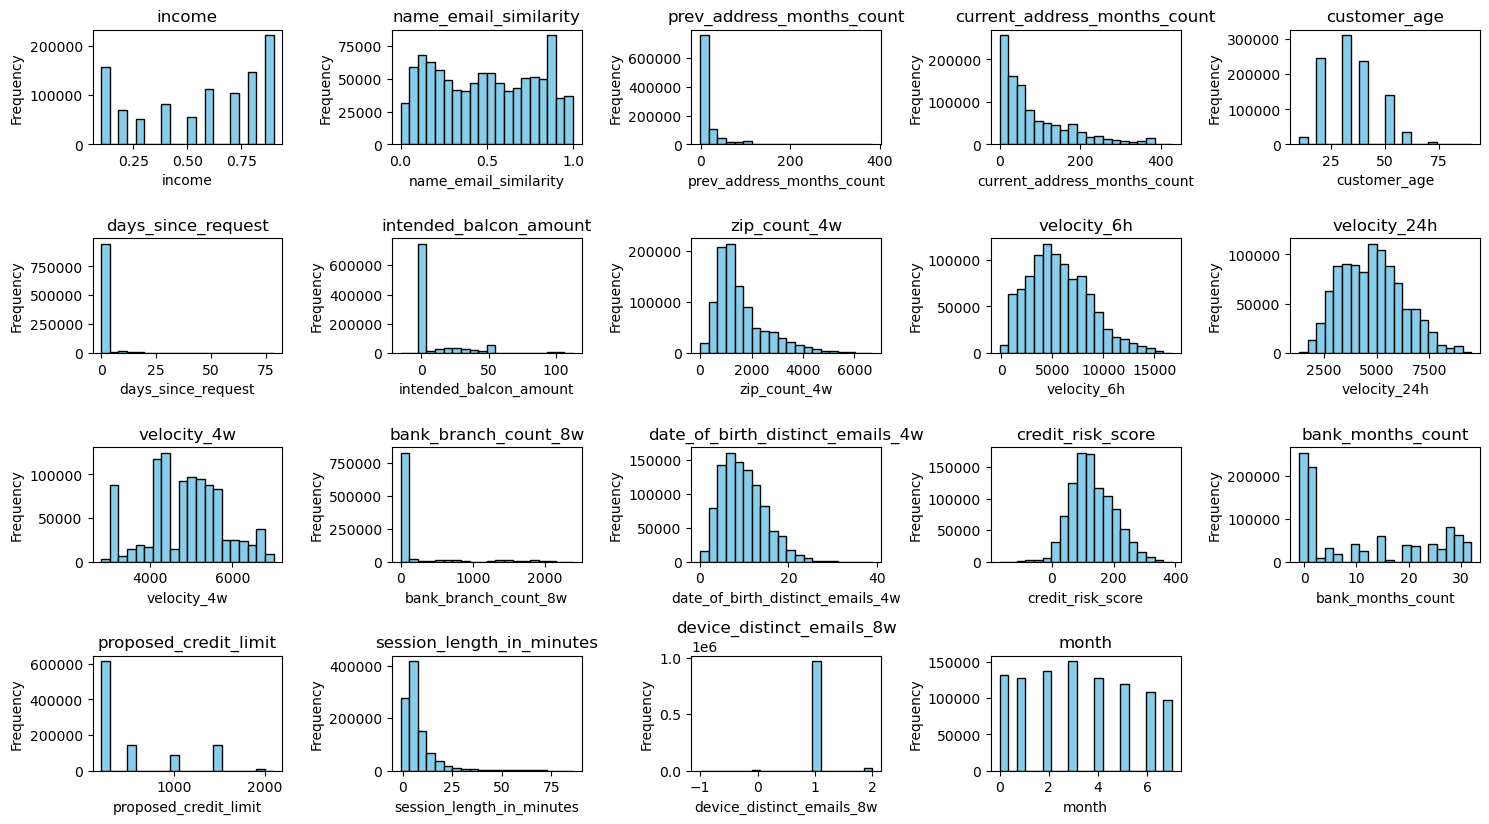

In [10]:
# check the distribution of the dataset - numeric
numeric_cols = ['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count',
                'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h',
                'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w',
                'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes',
                'device_distinct_emails_8w', 'month']

num_df_base = df_base[numeric_cols]

# Plot histograms for each numeric column
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_df_base.columns):
    plt.subplot(5, 5, i+1)
    plt.hist(num_df_base[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [50]:
df_base.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'month'],
      dtype='object')

prev_address_months_count, current_address_months_count, days_since_request, intended_balcon_amount, bank_branch_count_8w, bank_months_count, session_length_in_minutes

**Insight form the visualization above**

-> Since many of the features are right-skewed, log-transformation might be needed if we want to use linear models (e.g. logistic regression).

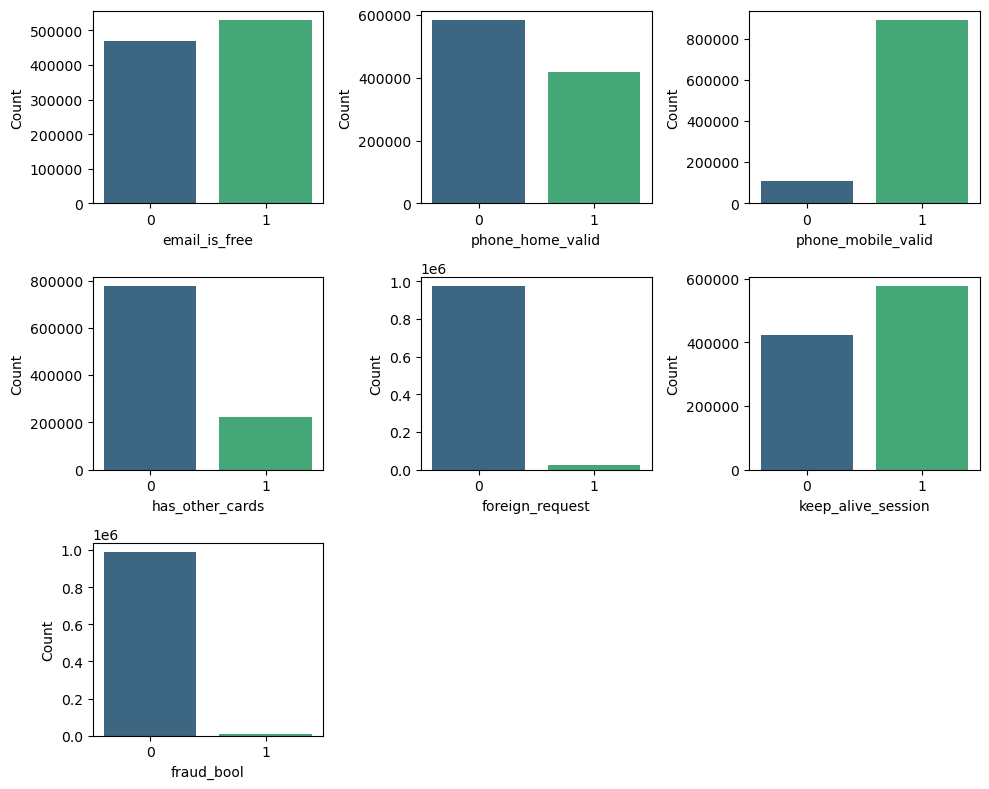

In [11]:
# check the distribution of the dataset - binary
binary_cols = ['email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'keep_alive_session', 'fraud_bool']
plt.figure(figsize=(10, 8))
for i, col in enumerate(binary_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df_base, x=col, palette='viridis')
    #plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [12]:
# 2.5%
df_base['foreign_request'].value_counts()

foreign_request
0    974758
1     25242
Name: count, dtype: int64

In [13]:
# 1.1%
df_base['fraud_bool'].value_counts()

fraud_bool
0    988971
1     11029
Name: count, dtype: int64

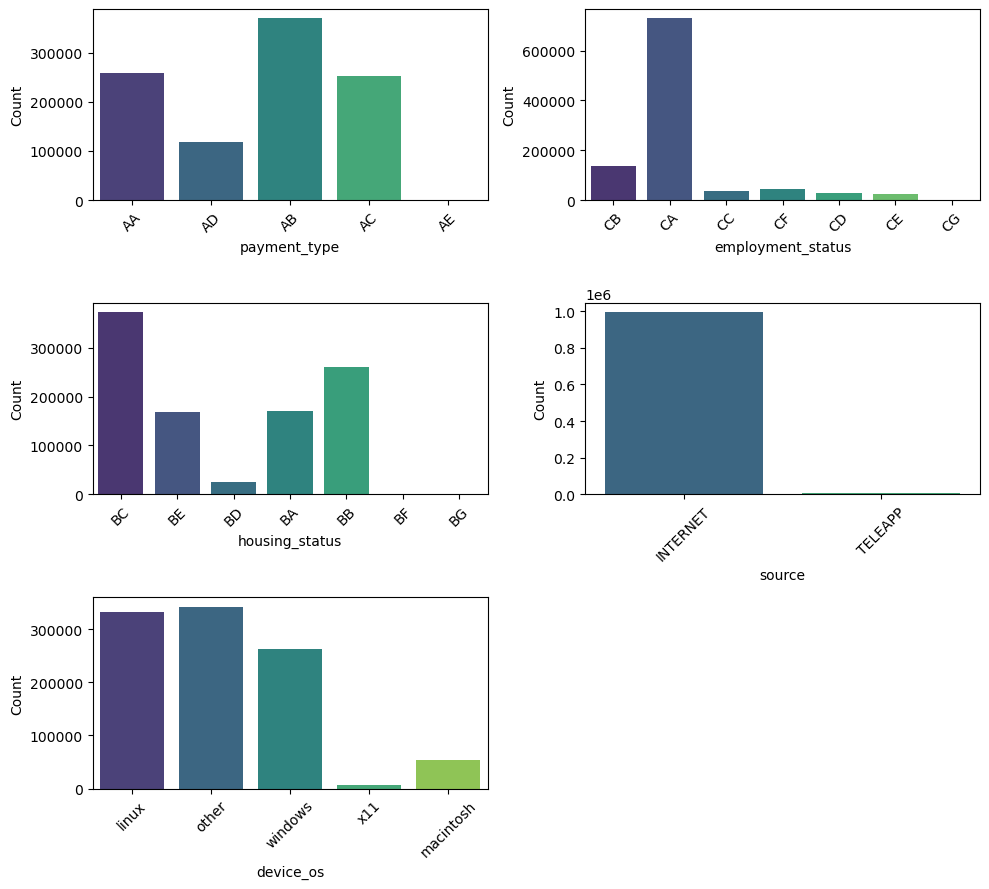

In [14]:
# check the distribution of the dataset - categorical
categorical_cols = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
plt.figure(figsize=(10, 9))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i+1)
    sns.countplot(data=df_base, x=col, palette='viridis')
    #plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

In [15]:
df_base['payment_type'].value_counts()

payment_type
AB    370554
AA    258249
AC    252071
AD    118837
AE       289
Name: count, dtype: int64

In [16]:
df_base['employment_status'].value_counts()

employment_status
CA    730252
CB    138288
CF     44034
CC     37758
CD     26522
CE     22693
CG       453
Name: count, dtype: int64

In [17]:
df_base['housing_status'].value_counts()

housing_status
BC    372143
BB    260965
BA    169675
BE    169135
BD     26161
BF      1669
BG       252
Name: count, dtype: int64

In [18]:
# 0.7%
df_base['source'].value_counts()

source
INTERNET    992952
TELEAPP       7048
Name: count, dtype: int64

## 2. Data Splitting and Engineering

**Data spliting method**

Recommended data splits? 

* In the paper, the authors use first 6 months of data for training and the last 2 months for validation.


In [19]:
df_base['month'].value_counts()

month
3    150936
2    136979
0    132440
4    127691
1    127620
5    119323
6    108168
7     96843
Name: count, dtype: int64

In [20]:
df_base.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'month'],
      dtype='object')

In [21]:
df_base['fraud_bool'].value_counts()

fraud_bool
0    988971
1     11029
Name: count, dtype: int64

**Insight from above**

-> The dataset is highly imbalance, only 1.1% records are positive.

In [22]:
df_base.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,13096.035018,7850.955007,6742.080561,5,5,CB,163,1,BC,0,1,9,0,1500.0,0,INTERNET,16.224843,linux,1,1,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,9223.283431,5745.251481,5941.664859,3,18,CA,154,1,BC,1,1,2,0,1500.0,0,INTERNET,3.363854,other,1,1,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,4471.472149,5471.988958,5992.555113,15,11,CA,89,1,BC,0,1,30,0,200.0,0,INTERNET,22.730559,windows,0,1,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,14431.993621,6755.344479,5970.336831,11,13,CA,90,1,BC,0,1,1,0,200.0,0,INTERNET,15.215816,linux,1,1,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,7601.511579,5124.046930,5940.734212,1,6,CA,91,0,BC,1,1,26,0,200.0,0,INTERNET,3.743048,other,0,1,0


In [23]:
## Optional, one hot encoding
df_encoded = pd.get_dummies(df_base)
df_encoded.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month,payment_type_AA,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CA,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BA,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,1059,13096.035018,7850.955007,6742.080561,5,5,163,1,0,1,9,0,1500.0,0,16.224843,1,1,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,1658,9223.283431,5745.251481,5941.664859,3,18,154,1,1,1,2,0,1500.0,0,3.363854,1,1,0,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,1095,4471.472149,5471.988958,5992.555113,15,11,89,1,0,1,30,0,200.0,0,22.730559,0,1,0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,3483,14431.993621,6755.344479,5970.336831,11,13,90,1,0,1,1,0,200.0,0,15.215816,1,1,0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,2339,7601.511579,5124.046930,5940.734212,1,6,91,0,1,1,26,0,200.0,0,3.743048,0,1,0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False


In [35]:
df_base_training = df_base[df_base['month'] < 6]
len(df_base_training)

794989

In [38]:
df_base_validating = df_base[df_base['month'] == 6]
len(df_base_validating)

108168

In [39]:
df_base_testing = df_base[df_base['month'] == 7]
len(df_base_testing)

96843

In [40]:
y_train = df_base_training['fraud_bool']
y_test = df_base_testing['fraud_bool']
y_val = df_base_validating['fraud_bool']

X_train = df_base_training.drop(['fraud_bool', 'month'], axis=1)
X_test = df_base_testing.drop(['fraud_bool', 'month'], axis=1)
X_val = df_base_validating.drop(['fraud_bool', 'month'], axis=1)

In [42]:
# check if it's reasonable
len(y_train) + len(y_test) + len(y_val)

1000000

In [43]:
len(X_train) + len(X_test) + len(X_val)

1000000

In [44]:
X_train.columns

Index(['income', 'name_email_similarity', 'prev_address_months_count',
       'current_address_months_count', 'customer_age', 'days_since_request',
       'intended_balcon_amount', 'payment_type', 'zip_count_4w', 'velocity_6h',
       'velocity_24h', 'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w'],
      dtype='object')

In [47]:
# Write out
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
y_val.to_csv('y_val.csv', index=False)

X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
X_val.to_csv('X_val.csv',index=False)

In [48]:
df_encoded_training = df_encoded[df_encoded['month'] < 6]
df_encoded_testing = df_encoded[df_encoded['month'] == 6]
df_encoded_validating = df_encoded[df_encoded['month'] == 7]
X_train_oh = df_encoded_training.drop(['fraud_bool', 'month'], axis=1)
X_test_oh = df_encoded_testing.drop(['fraud_bool', 'month'], axis=1)
X_val_oh = df_encoded_validating.drop(['fraud_bool', 'month'], axis=1)

In [49]:
X_train_oh.to_csv('X_train_oh.csv', index=False)
X_test_oh.to_csv('X_test_oh.csv', index=False)
X_val_oh.to_csv('X_val_oh.csv', index=False)